In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import pickle

from env import *
from policy.shortest import Shortest

In [9]:
def train(para, **kw):
    result = {}
    for l in tqdm(para['range']):
        l = round(l,2)
        nw.clean()
        result[l] = nw.train(para['times'],lambd = l, lr=para['lr'], freq = para['freq'], **kw)
    return result

In [10]:
nw = Network('net/6x6.net', is_drop=False)

In [4]:
nw.agent = Shortest(nw)

In [5]:
sh = {}

In [9]:
for k,v in train({
    'range': np.arange(0.1, 2.85, 0.1),
    'times': 10000,
    'lr': {},
    'freq': 1
}, droprate = True, hop = True).items():
    sh[k] = v['route_time']

100%|██████████| 28/28 [03:17<00:00,  7.07s/it]


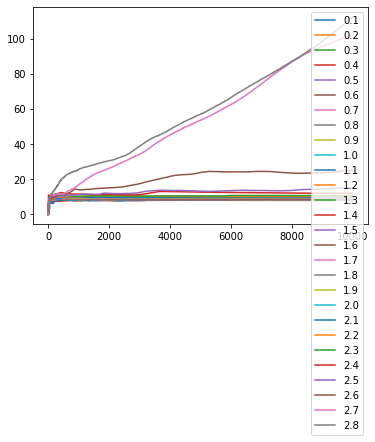

In [10]:
SH = pd.DataFrame(sh)
SH.plot()

In [11]:
SH.iloc[:,:].tail(1000).mean()

0.1      8.287422
0.2      7.925899
0.3      8.256130
0.4      8.160980
0.5      8.299077
0.6      8.403930
0.7      8.448900
0.8      8.353299
0.9      8.518002
1.0      8.529500
1.1      8.566053
1.2      8.720920
1.3      8.859813
1.4      8.815370
1.5      8.936221
1.6      8.978471
1.7      9.222419
1.8      9.294742
1.9      9.610288
2.0      9.816921
2.1      9.801509
2.2     10.197410
2.3     10.673851
2.4     12.030537
2.5     14.960802
2.6     24.375443
2.7     98.975620
2.8    105.315942
dtype: float64

In [13]:
# SH.to_csv('lata_shortest.csv',index=0)

# GLobal Route

In [11]:
from policy.shortest import GlobalRoute

nw.agent = GlobalRoute(nw)

In [12]:
GloR = {}
np.random.seed(221)

In [13]:
for k,v in train({
    'range': np.arange(3.4, 4.05, 0.1),
    'times': 10000,
    'lr': {},
    'freq': 1
}, droprate = True, hop = True).items():
    GloR[k] = v['route_time']

100%|██████████| 7/7 [1:27:45<00:00, 752.21s/it]


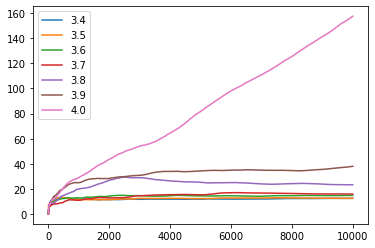

In [14]:
glor = pd.DataFrame(GloR)
glor.plot()

In [15]:
glor.tail(100).mean()
# plt.ylim(0,30)

3.4     12.396321
3.5     12.445467
3.6     14.737775
3.7     15.877452
3.8     23.203949
3.9     37.784716
4.0    156.774196
dtype: float64

In [10]:
# glor.to_csv('lata_global_route.csv',index=0)

# analyse what happen in a high load

In [11]:
np.set_printoptions(precision=4, threshold=36, edgeitems=36, linewidth=75, suppress=True, nanstr='nan', infstr='inf')

In [12]:
check_action = nw.agent.check_action
check_utilization = np.array(list(nw.agent.check_utilization.values()))

In [13]:
a_s = sum(check_utilization)
a_s

195742

In [14]:
utilize_percentage = (check_utilization/a_s * 100).reshape(6,6)
utilize_percentage

array([[1.0243, 1.2573, 0.8164, 1.0585, 1.3012, 0.847 ],
       [2.135 , 2.1242, 1.7845, 2.2136, 2.1998, 1.7763],
       [3.0862, 2.819 , 2.797 , 3.2017, 2.8916, 2.7204],
       [4.4257, 3.3519, 5.072 , 5.0786, 3.2604, 4.3961],
       [4.2398, 1.0718, 0.773 , 0.8164, 1.0417, 4.1994],
       [4.3082, 4.4104, 4.437 , 4.4181, 4.3522, 4.2934]])

In [15]:
m = np.mean(utilize_percentage)
var = np.var(utilize_percentage)
var

1.9862043855245117

In [16]:
check_action[10]

array([[ 25.,   0.,  15.,  21.],
       [ 35.,   0.,   9.,  24.],
       [ 32.,   0.,   6.,  20.],
       [176., 116.,   0.,   0.],
       [  0., 588.,   0.,   0.],
       [  0., 235.,  28.,   0.],
       [ 30.,   0.,  11.,  24.],
       [ 42.,   0.,   5.,  28.],
       [ 34.,   0.,   0.,  17.],
       [302.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0., 445.,   0.],
       [ 31.,   0.,  28.,  23.],
       [ 31.,   0.,   7.,  36.],
       [ 34.,   0.,   2.,  25.],
       [ 57.,   0.,   0.,  15.],
       [  0.,   0.,   0., 163.],
       [  0.,   0.,  57.,  12.],
       [ 19.,   0.,  28.,  29.],
       [ 36.,   0.,   8.,  30.],
       [ 50.,   0.,   0.,  32.],
       [ 46.,   0.,   0.,  26.],
       [  0.,   0.,   0., 152.],
       [  0.,   0.,  66.,  23.],
       [  7.,   0.,  47.,  29.],
       [ 42.,   0.,   6.,  30.],
       [ 41.,   0.,   1.,  21.],
       [  1.,   0.,   0., 160.],
       [  0.,   0.,   0., 146.],
       [  0.,   0.,  40.,  24.],
       [  

In [17]:
def check_only_one_action(check_dict):
    res = np.zeros((36,36))
    for s, vs in check_dict.items():
        for d in range(len(nw.agent.links)):
            check = vs[d]
            l = len(check)
            check = sum(check == 0)
            if check != l-1 and check != l:
                # there are multiple ways
                res[s][d] = 1
    return res

In [18]:
res = check_only_one_action(check_action)
# res
(res==0).all()

False

# BP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import pickle

from env import *

In [2]:
from policy.bp import BP, LBP

In [3]:
def train(para, **kw):
    result = {}
    for l in tqdm(para['range']):
        l = round(l,2)
        nw.clean()
        result[l] = nw.train(para['times'],lambd = l, lr=para['lr'], freq = para['freq'], **kw)
    return result

In [4]:
nw = Network('net/6x6.net', is_drop=False)

In [5]:
nw.agent = BP(nw)

In [6]:
bp = {}

In [7]:
for k,v in train({
    'range': np.arange(3.0, 3.35, 10.1),
    'times': 5000,
    'lr': {},
    'freq': 1
}, droprate = True, hop = True).items():
    bp[k] = v['route_time']

100%|██████████| 1/1 [00:15<00:00, 15.68s/it]


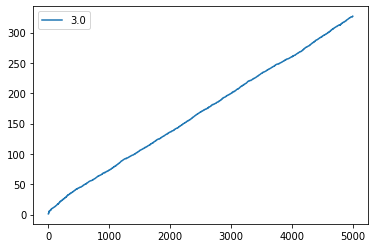

In [8]:
BP = pd.DataFrame(bp)
BP.plot()

In [9]:
BP.tail(1).mean()

3.0    326.971412
dtype: float64

In [10]:
nw.all_packets, nw.end_packets

(14878, 12418)

In [11]:
print6x6(nw)

Time: 5000
┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     
│No. 0│  0├ │No. 1│  0├ │No. 2│     │No. 3│  0├ │No. 4│  0├ │No. 5│
│    0│ ┤0  │    0│ ┤0  │    0│     │    0│ ┤0  │    0│ ┤0  │    0│
└─────┘     └─────┘     └─────┘     └─────┘     └─────┘     └─────┘     
 0┴ ┬0       0┴ ┬0       0┴ ┬0       0┴ ┬0       0┴ ┬0       0┴ ┬0      
┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     
│No. 6│  0├ │No. 7│  0├ │No. 8│     │No. 9│  0├ │No.10│  0├ │No.11│
│    0│ ┤0  │    0│ ┤0  │    0│     │    0│ ┤0  │    1│ ┤0  │    0│
└─────┘     └─────┘     └─────┘     └─────┘     └─────┘     └─────┘     
 0┴ ┬0       0┴ ┬0       0┴ ┬0       0┴ ┬0       0┴ ┬0       0┴ ┬0      
┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     ┌─────┐     
│No.12│  0├ │No.13│  0├ │No.14│     │No.15│  0├ │No.16│  0├ │No.17│
│    0│ ┤0  │    0│ ┤0  │    0│     │    1│ ┤0  │    0│ ┤0  │    1│
└─────┘     └─────┘     └─────┘     └─────┘     └─────┘     └─────┘   